In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
news = pd.read_csv("News_Category_Dataset_v2_prep_full.csv")

In [3]:
news.head()

,category,headline_pr,short_description_pr,union_pr
0,CRIME,2 mass shooting texas last week 1 tv,left husband killed child another day america,2 mass shooting texas last week 1 tvleft husba...
1,ENTERTAINMENT,smith join diplo nicky jam 2018 world cup offi...,course song,smith join diplo nicky jam 2018 world cup offi...
2,ENTERTAINMENT,hugh grant marries first time age 57,actor longtime girlfriend anna eberstein tied ...,hugh grant marries first time age 57actor long...
3,ENTERTAINMENT,jim carrey blast castrato adam schiff democrat...,actor give dems as kicking fighting hard enoug...,jim carrey blast castrato adam schiff democrat...
4,ENTERTAINMENT,julianna margulies us donald trump poop bag pi...,dietland actress said using bag really cathart...,julianna margulies us donald trump poop bag pi...


In [4]:
n = 1700
TRAVEL = news[news["category"] == "TRAVEL"].iloc[:n].reset_index()
SPORTS = news[news["category"] == "SPORTS"].iloc[:n].reset_index()
ENTERTAINMENT = news[news["category"] == "ENTERTAINMENT"].iloc[:n].reset_index()
WELLNESS = news[news["category"] == "WELLNESS"].iloc[:n].reset_index()
FOOD_DRINK = news[news["category"] == "FOOD & DRINK"].iloc[:n].reset_index()
QUEER_VOICES = news[news["category"] == "QUEER VOICES"].iloc[:n].reset_index()
WEDDINGS = news[news["category"] == "WEDDINGS"].iloc[:n].reset_index()

news = TRAVEL.append(SPORTS, ignore_index=True).append(ENTERTAINMENT, ignore_index=True)
news = news.append(WELLNESS, ignore_index=True).append(FOOD_DRINK, ignore_index=True)
news = news.append(WEDDINGS, ignore_index=True).append(QUEER_VOICES, ignore_index=True)

In [5]:
news

,index,category,headline_pr,short_description_pr,union_pr
0,126,TRAVEL,14 way make family road trip easier parent,waterproof cover seat kind brilliant,14 way make family road trip easier parentwate...
1,204,TRAVEL,14 trip take new york city long weekend,charming town relaxing beach top hiking destin...,14 trip take new york city long weekendcharmin...
2,205,TRAVEL,disney reveals opening season star war theme p...,star war galaxy edge open disneyland disney world,disney reveals opening season star war theme p...
3,256,TRAVEL,lonely planet top european destination 2018 ta...,underrated travel destination europe full tourist,lonely planet top european destination 2018 ta...
4,324,TRAVEL,8 majestic island europe tourist know yet,dreaming romantic european getaway involve gaz...,8 majestic island europe tourist know yetdream...
...,...,...,...,...,...
11895,34364,QUEER VOICES,trans teen gavin grimm responds laverne cox sh...,thrilled,trans teen gavin grimm responds laverne cox sh...
11896,34371,QUEER VOICES,would never date guy support donald trump,trump republican antithesis tolerant accepting,would never date guy support donald trumptrump...
11897,34424,QUEER VOICES,valentine best friend life without,may may share physical intimacy bond friendshi...,valentine best friend life withoutmay may shar...
11898,34434,QUEER VOICES,drag superstar vicky vox pride ability live au...,vicky vox veritable force nature powerhouse pe...,drag superstar vicky vox pride ability live au...


## Самые частотные слова в каждой тематике

In [6]:
from collections import Counter

In [7]:
news_grouped = news[["category", "union_pr"]].groupby("category") 
group_word_freeqs = {}
for group_name, group in news_grouped:
    word_freeqs = Counter()
    group["union_pr"].apply(lambda line: word_freeqs.update(line.split()))
    group_word_freeqs[group_name] = word_freeqs 

In [8]:
 for key in group_word_freeqs:
        print(key)
        print(group_word_freeqs[key].most_common(100))
        print()

ENTERTAINMENT
[('new', 183), ('star', 169), ('say', 153), ('show', 122), ('said', 113), ('year', 113), ('trump', 83), ('movie', 81), ('time', 77), ('like', 75), ('get', 74), ('first', 72), ('woman', 71), ('sexual', 69), ('actor', 64), ('back', 62), ('one', 62), ('oscar', 60), ('film', 58), ('people', 57), ('hollywood', 57), ('fan', 55), ('make', 54), ('best', 52), ('netflix', 50), ('actress', 48), ('john', 47), ('take', 47), ('black', 46), ('war', 45), ('look', 45), ('game', 45), ('season', 45), ('thing', 45), ('twitter', 43), ('donald', 42), ('got', 42), ('kim', 42), ('old', 41), ('dead', 41), ('day', 40), ('tv', 39), ('director', 39), ('give', 38), ('singer', 37), ('last', 37), ('u', 37), ('night', 37), ('kardashian', 36), ('made', 36), ('baby', 36), ('host', 36), ('talk', 36), ('2', 35), ('want', 35), ('life', 35), ('coming', 35), ('love', 35), ('world', 34), ('go', 34), ('b', 34), ('music', 34), ('trailer', 34), ('golden', 34), ('really', 32), ('reveals', 32), ('also', 32), ('story

### Графики

In [9]:
import matplotlib.pyplot as plt

In [10]:
def plot_top_words(model, feature_names, n_top_words, title):
    
    fig, axes = plt.subplots(2, 5, figsize=(30, 15)) # параметры отображения 
    axes = axes.flatten()
    all_features = {} # словарь для сохранения ключевых слов для тем
    
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1] 
        top_features = [feature_names[i] for i in top_features_ind]
        # строка для сохранения темы и слов в словарь
        
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
#         fig.suptitle(title, fontsize=40)

    plt.show()

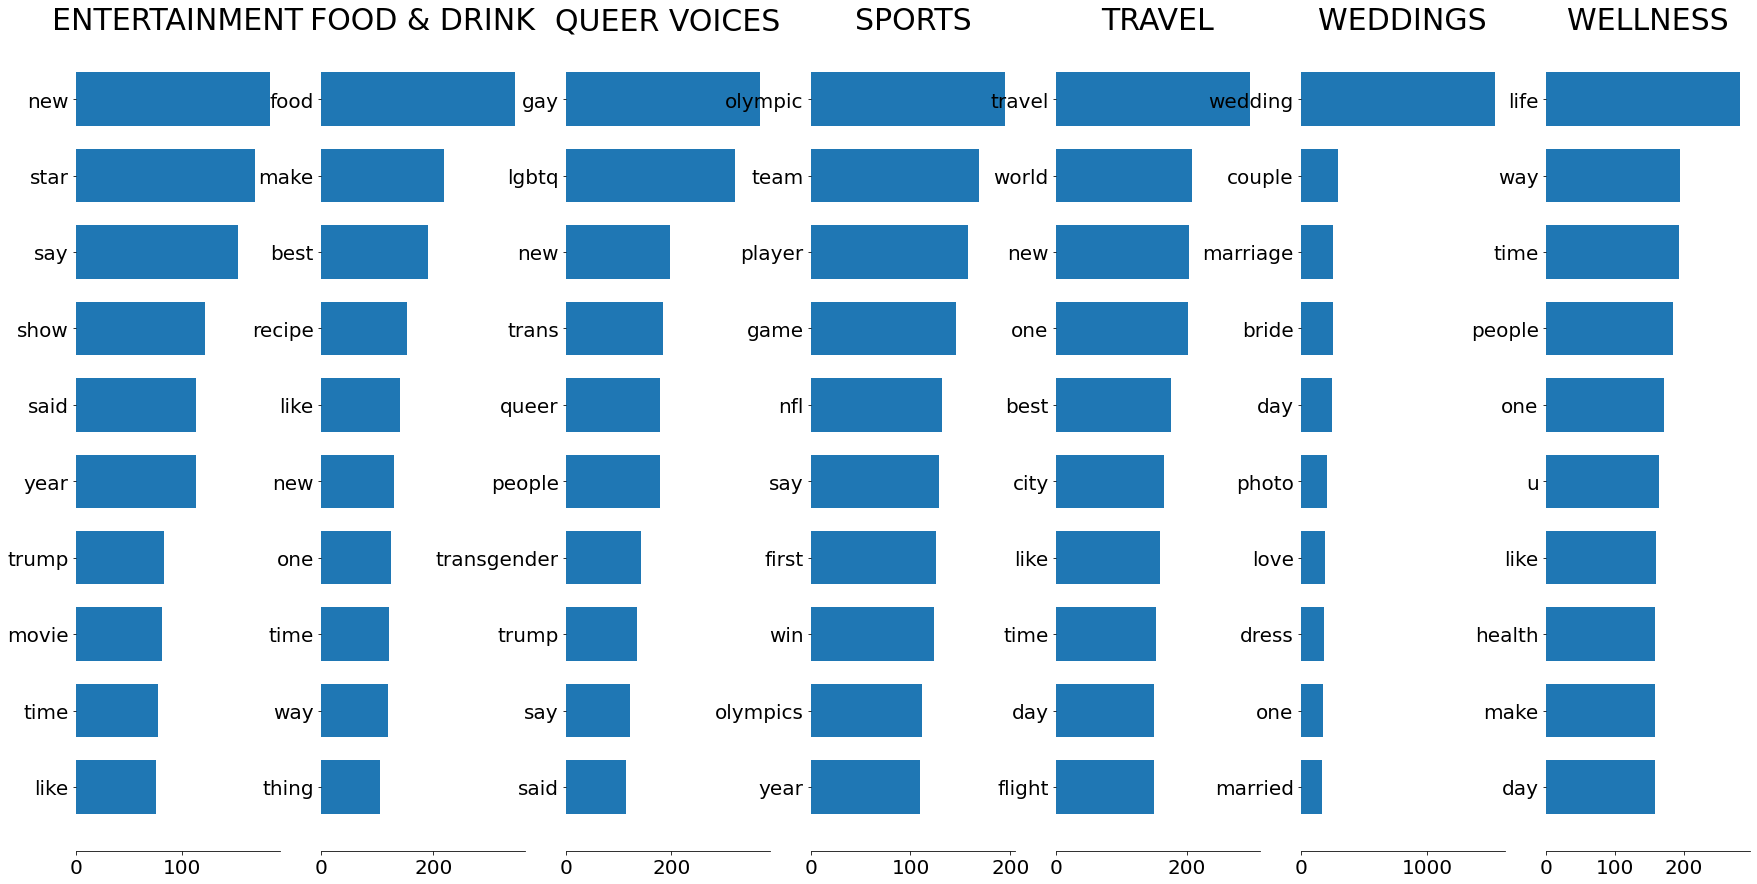

In [11]:
fig, axes = plt.subplots(1, 7, figsize=(30, 15)) # параметры отображения 
axes = axes.flatten()

for index, key in enumerate(group_word_freeqs):
    dct = dict(group_word_freeqs[key].most_common(10))
    axes[index].barh(list(dct.keys()), list(dct.values()), height=0.7)
    axes[index].set_title(key, fontdict={'fontsize': 30})
    axes[index].invert_yaxis()
    axes[index].tick_params(axis='both', which='major', labelsize=20)
    for i in 'top right left'.split():
        axes[index].spines[i].set_visible(False)


## Поиск расстояния

In [12]:
from gensim.models import Word2Vec

In [13]:
news_category = Word2Vec.load("word2vec_News_Category_Dataset.model") 

## Sports

In [14]:
words = list(dict(group_word_freeqs["SPORTS"].most_common(100)).keys())
print(words)

['olympic', 'team', 'player', 'game', 'nfl', 'say', 'first', 'win', 'olympics', 'year', 'said', 'woman', 'gold', 'world', 'nba', 'time', 'trump', 'sport', 'star', 'one', 'rio', 'medal', 'new', 'u', 'athlete', 'like', 'fan', 'national', 'football', 'soccer', 'two', 'super', 'old', 'winter', 'coach', 'usa', 'state', 'make', 'get', 'michael', 'league', 'nassar', 'james', 'final', 'american', 'former', 'history', 'second', 'last', 'sexual', 'want', 'kaepernick', 'ever', 'take', 'look', '1', 'bowl', 'man', 'could', 'day', 'record', 'thing', 'way', 'anthem', 'even', 'ncaa', '2016', 'abuse', 'gymnastics', 'russian', 'go', 'doping', 'baseball', 'lebron', 'show', '3', 'colin', 'hockey', 'basketball', 'going', 'championship', 'larry', 'phelps', 'event', 'protest', 'made', 'men', 'back', 'best', 'season', 'call', 'champion', 'really', '2', 'life', 'hit', 'williams', 'olympian', 'would', 'watch']


In [16]:
news_category.wv['player'] # Посмотреть вектор

array([ 1.4346386 ,  0.2172419 ,  0.5445907 , -1.3215128 ,  0.00733186,
       -0.05760287,  0.23559298, -1.3231289 , -1.110139  ,  0.44615406,
        0.45493034,  0.0895124 , -0.30086917,  0.6663028 , -0.5764501 ,
       -1.0428656 , -0.37932688,  2.3123758 , -0.3857291 , -0.8944774 ,
        1.2314171 ,  0.34401426, -0.9247511 , -0.09861387, -1.1419743 ,
        1.6147642 ,  0.21220136, -1.8468387 , -1.211978  ,  1.1753889 ,
        0.39216423,  1.1074848 , -0.6731407 ,  0.93691784,  1.7787793 ,
        0.11950482,  1.6262304 ,  1.2974216 , -2.782213  , -0.9521623 ,
        0.22998664, -1.1174242 , -1.0165504 ,  0.02161887, -0.4569142 ,
       -0.9269508 ,  1.2323622 ,  0.4988134 ,  0.42728543,  1.0438974 ,
        0.14898852, -0.8892457 , -2.204913  , -0.35514843,  0.06850944,
       -0.8425188 ,  1.6085141 ,  0.9945465 , -0.9342954 , -0.15874024,
       -0.24980582,  1.7029974 , -1.2875171 ,  0.60367805,  1.8370327 ,
        0.45812908,  2.4658823 , -0.9928062 ,  0.22046381,  0.64

In [17]:
news_category.wv.most_similar('player') # Посмотреть похожие слова

[('football', 0.8737607002258301),
 ('basketball', 0.8449459671974182),
 ('nfl', 0.8379102349281311),
 ('league', 0.8117823600769043),
 ('team', 0.797318160533905),
 ('baseball', 0.7968619465827942),
 ('coach', 0.7915477156639099),
 ('nba', 0.7688778638839722),
 ('hockey', 0.7622306942939758),
 ('athlete', 0.7382351756095886)]

In [18]:
print(news_category.wv['player'])
print(news_category.wv['year'])

[ 1.4346386   0.2172419   0.5445907  -1.3215128   0.00733186 -0.05760287
  0.23559298 -1.3231289  -1.110139    0.44615406  0.45493034  0.0895124
 -0.30086917  0.6663028  -0.5764501  -1.0428656  -0.37932688  2.3123758
 -0.3857291  -0.8944774   1.2314171   0.34401426 -0.9247511  -0.09861387
 -1.1419743   1.6147642   0.21220136 -1.8468387  -1.211978    1.1753889
  0.39216423  1.1074848  -0.6731407   0.93691784  1.7787793   0.11950482
  1.6262304   1.2974216  -2.782213   -0.9521623   0.22998664 -1.1174242
 -1.0165504   0.02161887 -0.4569142  -0.9269508   1.2323622   0.4988134
  0.42728543  1.0438974   0.14898852 -0.8892457  -2.204913   -0.35514843
  0.06850944 -0.8425188   1.6085141   0.9945465  -0.9342954  -0.15874024
 -0.24980582  1.7029974  -1.2875171   0.60367805  1.8370327   0.45812908
  2.4658823  -0.9928062   0.22046381  0.6496494   0.05803154  0.11847232
  1.011707    0.46761623 -1.4423525  -0.2766817  -2.0202081  -1.3119552
  1.1939548   0.29492128 -0.06992874 -0.5723169  -0.75100

In [19]:
vocab = news_category.wv.index_to_key # получить словарь
sports = []
for word in words:
    if word in vocab:
        sports.append(news_category.wv[word])
    
sports = np.array(sports)

In [20]:
sports.shape

(100, 100)

In [21]:
matrix = []
for i in range(sports.shape[0]):
    matrix.append(sports[:, i].mean())
len(matrix)

100

In [22]:
matrix = np.array(matrix)

In [23]:
news_category.wv.most_similar(positive=[matrix], topn=1) 

[('collegiate', 0.7997668981552124)]

In [24]:
news_category.wv.similarity("collegiate", "traveling")

0.36462086

## Travel

In [20]:
words = list(dict(group_word_freeqs["TRAVEL"].most_common(100)).keys())
print(words)

['travel', 'new', 'world', 'one', 'best', 'city', 'place', 'day', 'hotel', 'like', 'time', 'year', 'way', 'get', 'trip', 'thing', 'make', '10', 'flight', 'vacation', 'take', 'go', '5', 'beach', 'around', 'traveler', 'destination', 'love', 'island', 'country', 'visit', 'people', 'u', 'know', 'airline', 'even', 'first', 'top', 'see', 'park', 'little', 'home', 'town', 'every', 'great', 'traveling', 'reason', 'many', 'need', 'life', 'may', 'could', 'family', '7', 'want', 'american', 'experience', 'two', 'america', 'never', 'summer', 'road', 'list', 'look', 'next', 'back', 'part', 'come', 'tip', 'tourist', 'perfect', 'spring', 'still', 'say', 'resort', 'photo', 'york', 'airport', 'holiday', 'find', 'beautiful', 'hour', 'food', 'much', 'long', 'really', 'winter', 'good', 'local', 'right', 'europe', 'think', 'going', 'favorite', 'something', 'ski', 'air', 'last', 'ever', 'got']


In [21]:
news_category.wv['travel'] # Посмотреть вектор

array([-0.8929525 , -0.6439674 ,  0.4423513 , -0.08034885, -0.92846614,
       -1.9285005 , -0.14483413,  2.1386638 ,  0.13244504, -0.91187495,
       -0.9436799 , -2.0261462 , -1.8269668 ,  1.1929922 , -0.59329444,
       -0.3497418 ,  1.0421726 , -0.56853384,  0.17619956, -0.28108802,
        3.032528  , -0.93883693,  0.8088264 , -1.0790559 , -0.01227765,
        0.19611162, -0.36496732,  1.182942  , -0.05456687,  1.4187633 ,
       -0.3973859 ,  2.210895  ,  0.49008876, -2.1182477 ,  1.440104  ,
        0.05157078, -0.27321965, -1.3853136 ,  0.49806184, -0.94344395,
        1.9570322 , -1.7228123 , -0.04538931,  0.41646564,  1.7450217 ,
        0.47989532, -1.2084984 , -2.031083  ,  0.2223135 , -0.56071293,
        0.1856304 ,  0.35096714,  1.3997214 , -0.24710959, -0.70174944,
       -0.0197562 ,  0.00338497,  0.03262153, -0.17669348,  0.3278942 ,
       -1.0305331 , -0.11794911,  0.42098564, -1.5804466 ,  0.3157153 ,
        1.0378877 ,  0.70023155,  0.11296158, -0.3509418 , -0.21

In [22]:
news_category.wv.most_similar('travel') # Посмотреть похожие слова

[('traveler', 0.8318110704421997),
 ('destination', 0.7664557695388794),
 ('traveling', 0.7597246170043945),
 ('vacation', 0.7118176221847534),
 ('trip', 0.6827754378318787),
 ('honeymoon', 0.6807881593704224),
 ('booking', 0.6798457503318787),
 ('busiest', 0.6782686114311218),
 ('itinerary', 0.6768943071365356),
 ('offering', 0.6754525899887085)]

In [36]:
vocab = news_category.wv.index_to_key # получить словарь
travel = []
for word in words:
    if word in vocab:
        travel.append(news_category.wv[word])
    
travel = np.array(travel)

In [37]:
travel.shape

(100, 100)

In [38]:
matrix = []
for i in range(travel.shape[0]):
    matrix.append(travel[:, i].mean())
len(matrix)

100

In [39]:
matrix = np.array(matrix)

In [40]:
news_category.wv.most_similar(positive=[matrix], topn=1) 

[('traveling', 0.8422669172286987)]

## Wellness

In [24]:
words = list(dict(group_word_freeqs["WELLNESS"].most_common(100)).keys())
print(words)

['life', 'way', 'time', 'people', 'one', 'u', 'like', 'health', 'make', 'day', 'thing', 'get', 'may', 'love', 'new', 'help', 'could', 'take', 'feel', 'year', 'sleep', 'food', '5', 'cancer', 'work', 'need', 'want', 'body', 'study', 'go', 'well', 'better', 'good', 'know', 'heart', 'even', 'change', 'think', 'healthy', 'much', 'part', 'say', 'also', 'many', '10', 'would', 'weight', 'right', 'patient', 'best', 'find', 'something', 'come', 'first', 'world', 'really', 'others', 'risk', 'relationship', 'yoga', 'back', 'eating', 'woman', 'care', 'found', 'mind', 'let', 'never', 'living', 'drug', 'disease', 'feeling', 'moment', 'long', 'live', 'might', 'going', 'see', 'important', 'self', 'brain', 'fat', 'great', 'give', 'workout', 'happiness', 'family', 'person', '7', 'sometimes', 'child', 'thought', 'eat', 'look', 'problem', 'week', 'mental', 'mean', 'move', 'exercise']


In [25]:
news_category.wv['life'] # Посмотреть вектор

array([-0.05576981,  1.9642634 , -1.6825976 , -3.0842206 ,  2.3388777 ,
       -3.7203333 , -1.2496065 ,  4.4264054 ,  2.2089105 , -1.6408072 ,
        1.2188126 , -0.51213807, -1.5955124 ,  1.299346  ,  0.05881563,
        1.5026548 , -0.38367364, -0.78583795, -1.4975502 , -0.60498077,
        0.8564228 , -0.05838799, -0.99072963,  0.5826926 ,  0.7030876 ,
       -1.8825068 ,  0.5500583 , -2.2087543 ,  0.37814197, -0.4049791 ,
        1.8673918 ,  0.82094216, -0.92877257,  0.86139315, -0.8255278 ,
        1.1999828 , -1.8962322 , -1.5184681 ,  1.7872276 , -0.20036492,
        1.7465177 , -1.7617372 ,  0.61606187, -0.5538494 ,  1.368504  ,
       -1.0475533 , -0.84358454,  0.7414254 ,  2.4455552 ,  0.04537964,
        0.06619976,  0.5552974 ,  1.7934297 ,  0.07648607,  2.369894  ,
        0.20477065,  1.8196512 , -0.1871205 ,  0.6801809 , -1.273912  ,
       -1.6247038 , -0.28623465,  0.39173433,  0.6564885 , -0.83253974,
        1.5311826 ,  1.5123577 , -1.4685928 ,  0.1958616 , -0.54

In [26]:
news_category.wv.most_similar('life') # Посмотреть похожие слова

[('experience', 0.6032000184059143),
 ('worldfinding', 0.5859621167182922),
 ('meaningful', 0.5656275749206543),
 ('relationship', 0.5643864274024963),
 ('fully', 0.5639217495918274),
 ('meant', 0.5543309450149536),
 ('friendship', 0.5530180335044861),
 ('motherhood', 0.5517522692680359),
 ('grateful', 0.5508873462677002),
 ('truly', 0.5488318800926208)]

In [27]:
vocab = news_category.wv.index_to_key # получить словарь
wellness = []
for word in words:
    if word in vocab:
        wellness.append(news_category.wv[word])
    
wellness = np.array(wellness)

In [28]:
wellness.shape

(100, 100)

In [29]:
matrix = []
for i in range(wellness.shape[0]):
    matrix.append(wellness[:, i].mean())
len(matrix)

100

In [30]:
matrix = np.array(matrix)

In [31]:
news_category.wv.most_similar(positive=[matrix], topn=1) 

[('stressed', 0.8907976746559143)]

In [47]:
news_category.wv.similarity("stressed", "booze")

0.46284205

## Entretainment

In [33]:
words = list(dict(group_word_freeqs["ENTERTAINMENT"].most_common(100)).keys())
print(words)

['new', 'star', 'say', 'show', 'said', 'year', 'trump', 'movie', 'time', 'like', 'get', 'first', 'woman', 'sexual', 'actor', 'back', 'one', 'oscar', 'film', 'people', 'hollywood', 'fan', 'make', 'best', 'netflix', 'actress', 'john', 'take', 'black', 'war', 'look', 'game', 'season', 'thing', 'twitter', 'donald', 'got', 'kim', 'old', 'dead', 'day', 'tv', 'director', 'give', 'singer', 'last', 'u', 'night', 'kardashian', 'made', 'baby', 'host', 'talk', '2', 'want', 'life', 'coming', 'love', 'world', 'go', 'b', 'music', 'trailer', 'golden', 'really', 'reveals', 'also', 'story', 'james', 'would', 'family', 'chrissy', 'jennifer', 'accused', 'ryan', 'teigen', 'michael', 'jimmy', 'girl', 'know', 'video', 'hit', 'award', 'set', 'need', 'roseanne', 'american', 'call', 'panther', 'tell', 'good', 'globe', 'could', 'watch', 'david', 'ellen', 'little', 'right', 'west', 'reportedly']


In [34]:
news_category.wv['new']

array([-0.62584734,  1.0837263 , -0.7265201 ,  1.0855874 ,  0.5800832 ,
       -1.9335208 ,  2.7430096 ,  1.4957602 , -0.99558604, -0.19826487,
        1.8057846 ,  0.89860654, -3.3120902 ,  1.1154747 , -0.3672594 ,
        0.7464682 , -0.1834364 , -0.30134892, -2.6978583 , -2.6642945 ,
        1.2400774 ,  0.67085594,  1.9754494 , -1.0396445 ,  2.3211138 ,
       -3.165262  ,  0.50517005, -0.66320354, -1.0452874 ,  0.5888691 ,
       -0.6577867 ,  0.47751227,  2.1990845 , -1.1984006 ,  0.08188101,
       -1.0820111 ,  0.12420285, -0.8943856 ,  0.5567378 , -0.42873156,
       -1.0868396 , -0.20127869, -1.8868735 , -0.9941776 , -1.465375  ,
        1.4973668 , -0.33326492,  0.72889733,  2.4532955 ,  1.2443078 ,
       -0.18110897,  1.570785  , -2.2261503 ,  0.97839814,  2.4787025 ,
       -2.0640144 ,  1.9859856 ,  2.2657397 , -1.1702398 ,  0.9743015 ,
       -1.3624827 , -0.6949682 , -1.185886  , -0.9701849 ,  1.3828593 ,
        1.5705373 , -0.7562082 ,  1.0972184 , -0.82961226,  1.10

In [35]:
news_category.wv.most_similar('new')

[('citynew', 0.6901751756668091),
 ('cbsnewyork', 0.6742492914199829),
 ('sandynew', 0.6655153632164001),
 ('minster', 0.665090799331665),
 ('nycnew', 0.6401103734970093),
 ('citytwo', 0.6360494494438171),
 ('taxnew', 0.6314601302146912),
 ('lastnew', 0.6085033416748047),
 ('cnnmoney', 0.607225239276886),
 ('weddingnew', 0.6048398017883301)]

In [36]:
vocab = news_category.wv.index_to_key # получить словарь
entertainment = []
for word in words:
    if word in vocab:
        entertainment.append(news_category.wv[word])
    
entertainment = np.array(entertainment)

In [37]:
matrix = []
for i in range(entertainment.shape[0]):
    matrix.append(entertainment[:, i].mean())
len(matrix)

100

In [38]:
matrix = np.array(matrix)

In [39]:
news_category.wv.most_similar(positive=[matrix], topn=1) 

[('qween', 0.8647509813308716)]

## FOOD AND DRINK

In [40]:
words = list(dict(group_word_freeqs["FOOD & DRINK"].most_common(100)).keys())
print(words)

['food', 'make', 'best', 'recipe', 'like', 'new', 'one', 'time', 'way', 'thing', 'year', 'wine', '10', 'eat', 'chocolate', 'know', 'restaurant', 'taste', 'day', 'u', 'holiday', 'get', 'good', 'cheese', 'love', 'need', '5', 'favorite', 'drink', 'world', 'dish', 'beer', 'chicken', 'thanksgiving', 'want', 'cooking', 'even', 'delicious', 'cake', 'burger', 'made', 'go', 'ever', 'never', 'dinner', 'eating', 'cocktail', 'coffee', 'perfect', 'great', 'pizza', 'better', 'american', 'sauce', 'would', 'kitchen', 'dessert', 'hot', 'come', 'right', 'people', 'top', 'making', 'chef', 'think', 'party', 'every', 'look', 'cream', 'around', 'bacon', 'might', 'sweet', 'bar', 'ice', 'little', 'reason', 'sandwich', 'bowl', 'turkey', 'candy', 'america', 'actually', 'really', 'breakfast', 'two', 'cook', 'easy', 'flavor', 'healthy', 'free', 'butter', 'home', 'kind', 'order', 'much', 'first', 'without', 'super', 'lot']


In [41]:
news_category.wv['food']

array([-1.2610805 , -2.373608  , -0.3204888 , -0.11983506,  0.84449434,
       -2.2575915 ,  1.8644425 ,  3.0035615 , -0.306712  , -0.3276883 ,
       -2.1197362 , -0.37715173, -1.3273813 ,  0.7210304 ,  2.1989548 ,
       -0.7205569 ,  0.26655787,  0.1416099 , -0.41014954,  0.41276696,
       -0.22594401,  0.5775353 ,  1.1044847 , -0.15051709, -1.2359846 ,
       -0.897921  , -0.28886953, -1.49274   , -0.06689809, -0.89722395,
        0.5493005 ,  1.2467594 ,  0.44233662,  0.85128164,  0.5680287 ,
        0.9964116 ,  0.5604194 , -0.97245747,  1.0638971 ,  0.5507042 ,
        0.10355817, -0.7279351 , -1.6916327 , -1.2236054 ,  0.2383554 ,
        2.3755422 , -2.642411  ,  1.3353002 ,  1.8442322 ,  0.28268936,
        0.7935428 , -2.1642005 , -0.9620827 ,  0.9005169 , -1.5934842 ,
        1.9238936 ,  0.95727074,  1.3211157 ,  1.2305379 , -0.29407075,
        1.2568576 ,  1.3445019 , -2.2911441 , -2.3298547 , -1.847747  ,
        0.3151313 , -0.23892778, -0.98524565, -1.1940589 ,  2.68

In [42]:
news_category.wv.most_similar('food')

[('nutritious', 0.7130677700042725),
 ('organic', 0.7035893797874451),
 ('junk', 0.692295491695404),
 ('foodknow', 0.6920154690742493),
 ('diet', 0.6872634291648865),
 ('fooddangerous', 0.6858177781105042),
 ('digesting', 0.6847081184387207),
 ('fast', 0.6778801679611206),
 ('vegan', 0.6726208925247192),
 ('beverage', 0.6712450385093689)]

In [43]:
vocab = news_category.wv.index_to_key # получить словарь
food = []
for word in words:
    if word in vocab:
        food.append(news_category.wv[word])
    
food = np.array(food)

In [44]:
matrix = []
for i in range(food.shape[0]):
    matrix.append(food[:, i].mean())
len(matrix)

100

In [45]:
matrix = np.array(matrix)

In [46]:
news_category.wv.most_similar(positive=[matrix], topn=1) 

[('booze', 0.8751394748687744)]